# Exercise 4 - Fully Connected Networks and the MNIST dataset

In this exercise we want to train a multi-classification network using fully-connected layers in order to distinguish the different numbers of the MNIST database of handwritten digits.
This exercise is based on https://github.com/leriomaggio/deep-learning-keras-tensorflow



# The MNIST database

The MNIST (Modified National Institute of Standards and Technology) database ([link](http://yann.lecun.com/exdb/mnist)) has a database of handwritten digits. The dataset  consists of 28x28 grayscale images of the 10 digits.

<img src='https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png' style="height:400px; display:inline">

Since this dataset is **provided** with Keras, we can easily load a training and test set using `tensorflow.keras.dataset`.

`from tensorflow.keras.datasets import mnist`<br>
`(X_train, y_train), (X_test, y_test) = mnist.load_data()`

The training set has $60,000$ samples. 
The test set has $10,000$ samples.
The digits are size-normalized and centered in a fixed-size image. 
The data page has a description on how the data was collected. It also reports the performance of various algorithms on the test dataset. 

As usual we will load tensorflow 2 first and make sure we changed our runtime to python 3:

In [1]:
#Check if colab is running
import sys
IN_COLAB = 'google.colab' in sys.modules

if IN_COLAB:
  %tensorflow_version 2.x
    
#import TF  
import tensorflow as tf
from platform import python_version
print("Tensorflow version", tf.__version__)
print("Python version =",python_version())

Tensorflow version 2.12.0
Python version = 3.11.5


## Task 1: Data preparation 
* Download the data
* Inspect the data and plot a few of the images using `matplotlib.pyplot.imshow` 
* Reshape the input data to be in 1D-vectorial form (original data are images)
* Convert the input data to do dtype `float32` using `astype in order to scale it afterwards`
* Normalize the design matrix entries to values between 0 and 1 by scaling it
* How many classes do you have? How much data of each class?
* Convert the class vector to binary class matrices (**one-hot-vector**). Use the `to_categorical` function from `tensorflow.keras.utils` to convert integer labels to **one-hot-vectors**.
* Split the training set into training and validation data (30%)

### Download the datasets and display first entry

In [2]:
from tensorflow.keras.datasets import mnist # type: ignore
import matplotlib.pyplot as plt # type: ignore

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train shape (60000, 28, 28) ; y_train shape (60000,) ; X_test shape (10000, 28, 28) ; y_test shape (10000,)
X_train size 47040000 ; y_train size 60000 ; X_test size 7840000 ; y_test size 10000


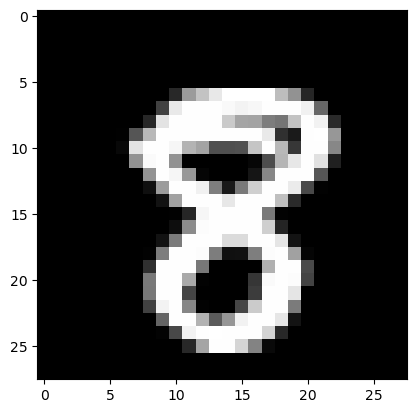

In [3]:
print("X_train shape", X_train.shape,  "; y_train shape", y_train.shape, "; X_test shape", X_test.shape, "; y_test shape", y_test.shape)
print("X_train size", X_train.size,  "; y_train size", y_train.size, "; X_test size", X_test.size, "; y_test size", y_test.size)

plt.imshow(X_train[23456], cmap='gray')
plt.show()

### Reshape the datasets

In [4]:
print("X_train shape", X_train.shape, "; X_test shape", X_test.shape)

X_train = X_train.reshape((X_train.shape[0], 28*28))
X_test = X_test.reshape((X_test.shape[0], 28*28))

print("X_train shape", X_train.shape, "; X_test shape", X_test.shape, "; y_train shape", y_train.shape, "; y_test shape", y_test.shape)

X_train shape (60000, 28, 28) ; X_test shape (10000, 28, 28)
X_train shape (60000, 784) ; X_test shape (10000, 784) ; y_train shape (60000,) ; y_test shape (10000,)


### Convert to float32 

In [5]:
X_train.astype('float32')
X_test.astype('float32')
y_test.astype('float32')
y_train.astype('float32')

array([5., 0., 4., ..., 5., 6., 8.], dtype=float32)

### Scale the input data

In [6]:
X_train = X_train / 255
X_test = X_test / 255

### Convert class vectors to binary class matrices

In [7]:
from tensorflow.keras.utils import to_categorical # type: ignore

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

## Task 2: Build and train a neural network
* Design a dense neural network structure with at least two hidden layers.
* Choose `softmax` as activation for the output node (normalized multi-class probability)
* Use `categorical_crossentropy` as loss function (multi-class version of crossentropy)
* Use `adam` as optimizer and a batch size of 512 (speed things up)
* Train the NN over 50 epochs
* Plot the evolution of the training and validation loss as well as of one meaningful metric by defining a function `plot_history`. What do you observe?
* Evaluate the performance on the test set using `sklearn.metrics`
* Plot the probability of being a *Zero* for true zeros and for all other numbers

## Building the model

In [8]:
from tensorflow.keras.models import Sequential # type: ignore
from tensorflow.keras.layers import Dense # type: ignore

model = Sequential()
model.add(Dense(64, input_dim=28 * 28, activation='relu'))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 67,466
Trainable params: 67,466
Non-trainable params: 0
_________________________________________________________________


## Training

In [9]:
history = model.fit(X_train, y_train, validation_split=0.3, epochs=50, batch_size=512, validation_data=(X_test, y_test))

Epoch 1/50
  1/118 [..............................] - ETA: 18s - loss: 2.3292 - accuracy: 0.1055

2024-05-20 16:23:28.461225: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


118/118 [==============================] - 1s 3ms/step - loss: 0.6533 - accuracy: 0.8054 - val_loss: 0.2465 - val_accuracy: 0.9268
Epoch 2/50
118/118 [==============================] - 0s 2ms/step - loss: 0.2116 - accuracy: 0.9384 - val_loss: 0.1838 - val_accuracy: 0.9447
Epoch 3/50
118/118 [==============================] - 0s 2ms/step - loss: 0.1604 - accuracy: 0.9535 - val_loss: 0.1416 - val_accuracy: 0.9591
Epoch 4/50
118/118 [==============================] - 0s 2ms/step - loss: 0.1300 - accuracy: 0.9617 - val_loss: 0.1318 - val_accuracy: 0.9597
Epoch 5/50
118/118 [==============================] - 0s 2ms/step - loss: 0.1088 - accuracy: 0.9684 - val_loss: 0.1152 - val_accuracy: 0.9654
Epoch 6/50
118/118 [==============================] - 0s 2ms/step - loss: 0.0918 - accuracy: 0.9716 - val_loss: 0.1029 - val_accuracy: 0.9687
Epoch 7/50
118/118 [==============================] - 0s 2ms/step - loss: 0.0813 - accuracy: 0.9752 - val_loss: 0.1039 - val_accuracy: 0.9683
Epoch 8/50
118/11

### Plotting the network history
As seen before, the return value of the `fit` function is a `keras.callbacks.History` object which contains the entire history of training/validation loss and defined metric (accuracy) for each epoch. Let's define a function to plot the history:

In [10]:
def plot_history(network_history):
    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(network_history.history['loss'])
    plt.plot(network_history.history['val_loss'])
    plt.legend(['Training', 'Validation'])

    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.plot(network_history.history['accuracy'])
    plt.plot(network_history.history['val_accuracy'])
    plt.legend(['Training', 'Validation'])
    plt.show()


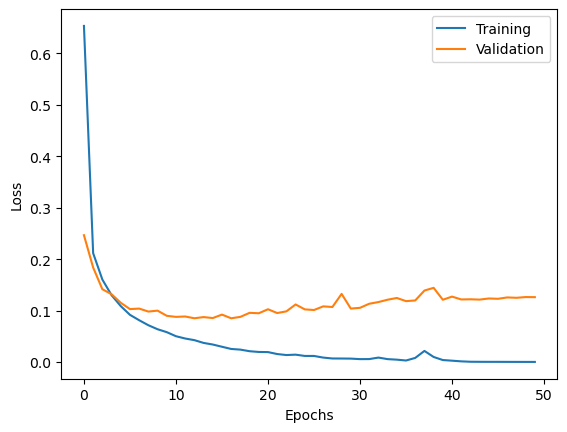

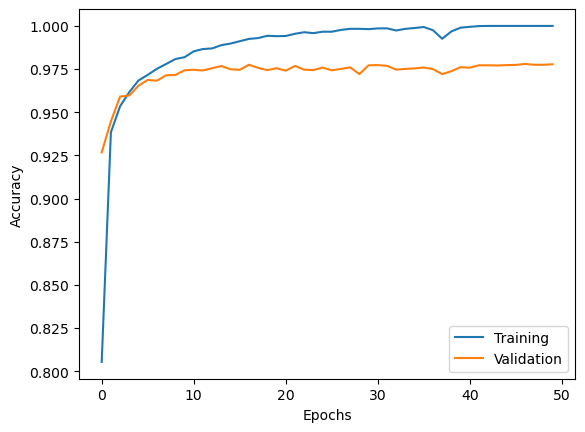

In [11]:
plot_history(history)

## Evaluation

In [12]:
from sklearn.metrics import accuracy_score # type: ignore
from sklearn.metrics import classification_report # type: ignore

y_pred = model.predict(X_test)
y_pred = y_pred.argmax(axis=1)
y_test = y_test.argmax(axis=1)

# x_pred = model.predict(X_train)
# x_pred = x_pred.argmax(axis=1)
# y_train = y_train.argmax(axis=1)

313/313 [==============================] - 0s 277us/step


In [13]:
print('Accuracy Score = ' , accuracy_score(y_test, y_pred))
print('\n', 'Classification Report:')
print(classification_report(y_test, y_pred))
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error # type: ignore

# Explained variance score: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The mean squared error
print("Mean absolute error: %.2f" % mean_absolute_error(y_test, y_pred))


Accuracy Score =  0.9778

 Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.96      0.98      0.97      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.97      0.97       892
           6       0.98      0.98      0.98       958
           7       0.97      0.98      0.98      1028
           8       0.98      0.97      0.97       974
           9       0.97      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

Coefficient of determination: 0.95
Mean squared error: 0.42
Mean absolute error: 0.08


## Plotting the output

In [14]:
# import pandas as pd # type: ignore
# import seaborn as sns # type: ignore
# from pandas.plotting import scatter_matrix # type: ignore

# df = pd.DataFrame(y_pred, columns=['y_pred'])
# df['y_test'] = y_test

# sns.pairplot(df)
# plt.show()

# scatter_matrix(df, alpha=0.2, figsize=(6, 6), diagonal='kde')
# plt.show()

# from sklearn.metrics import confusion_matrix # type: ignore

# cm = confusion_matrix(y_test, y_pred)
# print(cm)

# plt.figure(figsize=(9,9))
# sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
# plt.ylabel('Actual label');
# plt.xlabel('Predicted label');
# all_sample_title = 'Accuracy Score: {0}'.format(accuracy_score(y_test, y_pred))
# plt.title(all_sample_title, size = 15);
# plt.show()

### Plotting the normalized probability prob_i = p_i / sum(p_i)

In multi-class problems the interpretation of the n-dimensional output is not always trivial, in particular if an output activation function is used which can not be interpreted as a probability. If one is only interested in distinguishing two of the classes one could build the ratio of these two class responses in order to get the best discrimination. Similarly, one could weight different classes according their importance for the specific problem. Because we have used a softmax activation together with the categorical cross-entropy we can directly interpret our output as probabilities and don't need to normalize it. If that is not the case you can define a multi-class probability for instance in the following way: 

In [15]:
def prob_multiclass(Y_pred, index):
    n_cls = len(Y_pred[0])

    Y_prob=[]
    for i in range(len(Y_pred)):
        numerator=Y_pred[i,index]
        denominator=0.0
        for idx in range(n_cls):
            denominator+=Y_pred[i,idx]
        
        Y_prob.append(numerator/denominator)
        
    return np.asarray(Y_prob)

### Plot the confusion matrix

A good way to show the performance of a multi-class output is the confusion matrix: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

In [20]:
#Note, this code is taken straight from the SKLEARN website, a nice way of viewing confusion matrix.
import numpy as np # type: ignore
import itertools
import matplotlib.cm as cm # type: ignore

def plot_confusion_matrix(cm, classes,
                          normalize=True,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

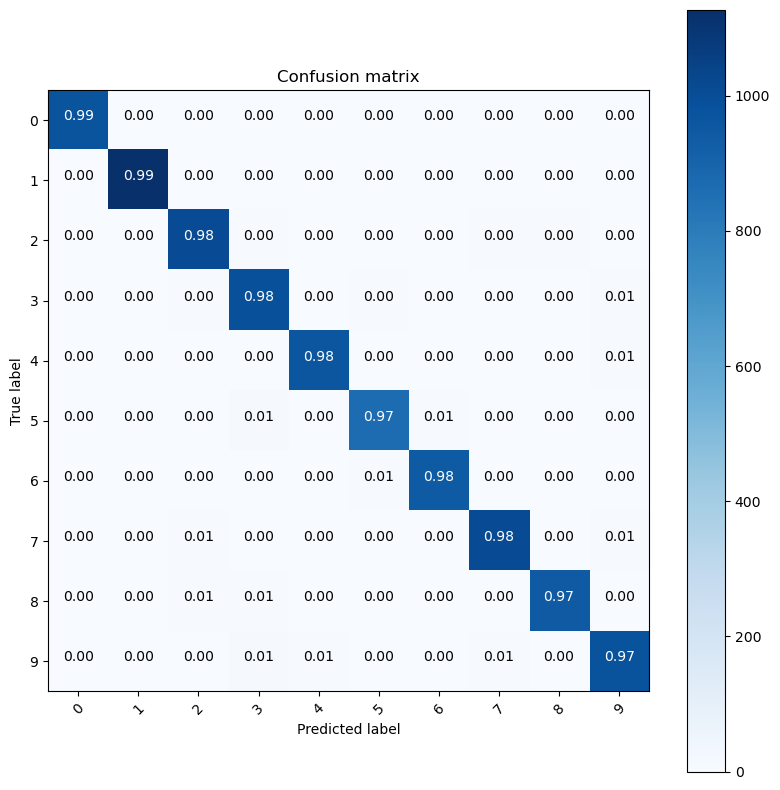

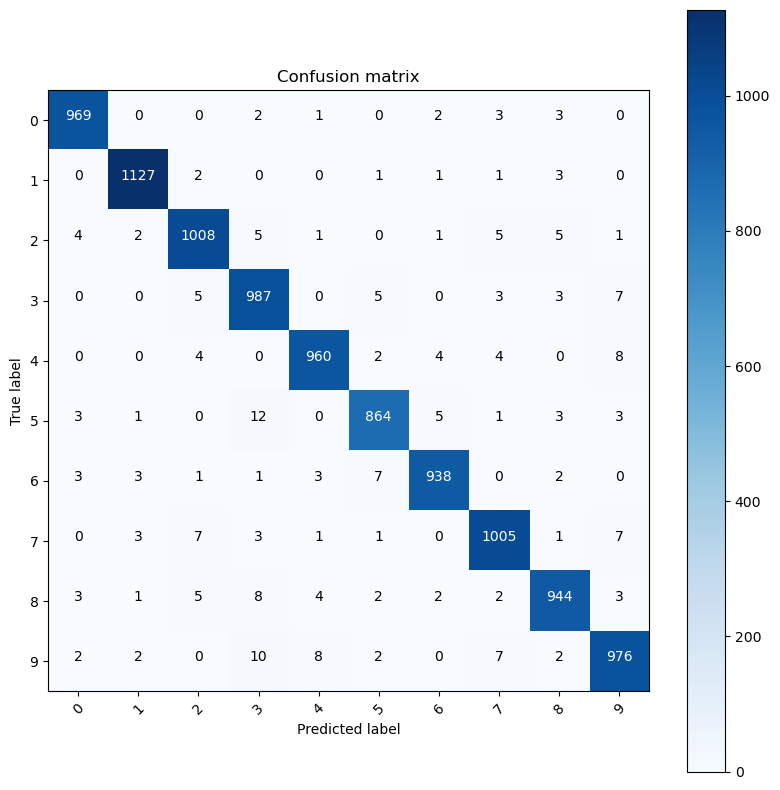

In [21]:
from sklearn.metrics import confusion_matrix # type: ignore
# compute the confusion matrix
confusion_mtx = confusion_matrix(y_test, y_pred) 
# plot the confusion matrix
plt.figure(figsize=(8,8))
plot_confusion_matrix(confusion_mtx, classes = range(10))
plt.figure(figsize=(8,8))
plot_confusion_matrix(confusion_mtx, classes = range(10), normalize=False)

### Plot wrong associations

 Errors are difference between predicted labels and true labels

In [22]:
errors = (y_pred - y_test != 0)

Y_cls_errors = y_test[errors]
Y_pred_errors = y_pred[errors]
Y_true_errors = y_test[errors]
X_test_errors = X_test[errors]

Define plotting function

In [23]:
def display_errors(errors_index,img_errors,pred_errors, obs_errors):
    """ This function shows 6 images with their predicted and real labels"""
    n = 0
    nrows = 2
    ncols = 3
    fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True)
    for row in range(nrows):
        for col in range(ncols):
            error = errors_index[n]
            ax[row,col].imshow((img_errors[error]).reshape((28,28)), cmap=cm.Greys, interpolation='nearest')
            ax[row,col].set_title("Predicted label :{}\nTrue label :{}".format(pred_errors[error],obs_errors[error]))
            n += 1


Rank errors by difference in probability

In [24]:
# Probabilities of the wrong predicted numbers
Y_pred_errors_prob = np.max(Y_pred_errors,axis = 1)

# Predicted probabilities of the true values in the error set
true_prob_errors = np.diagonal(np.take(Y_pred_errors, Y_true_errors, axis=1))

# Difference between the probability of the predicted label and the true label
delta_pred_true_errors = Y_pred_errors_prob - true_prob_errors

# Sorted list of the delta prob errors
sorted_dela_errors = np.argsort(delta_pred_true_errors)

# Top 6 errors 
most_important_errors = sorted_dela_errors[-6:]


AxisError: axis 1 is out of bounds for array of dimension 1

In [25]:
# Show the top 6 errors
display_errors(most_important_errors, X_test_errors, Y_cls_errors, Y_true_errors)

NameError: name 'most_important_errors' is not defined

## Using Dropout Layers

As we have learned last time, the trainings and validation loss of the fit history is not comparable when using dropout. We can define our own callback function which calculates the loss and metric after each epoch for any dataset

In [ ]:
from tensorflow.keras.callbacks import Callback

class HistoryEpoch(Callback):
    def __init__(self, data):
        self.data = data        
        
    def on_train_begin(self, logs={}):
        self.loss = []
        self.acc = []

    def on_epoch_end(self, epoch, logs={}):
        x, y = self.data
        l, a = self.model.evaluate(x, y, verbose=0)
        self.loss.append(l)
        self.acc.append(a)

## Task 3: Using regularizer


* Modify your previous example network by adding a Dropout layer after each hidden layer
* Add l2 regularization to the hidden layers
* Use the new defined `HistoryEpoch` for training, validation and test data set in order to save a comparable loss function and metric. This is done by e.g.: `train_hist=HistoryEpoch((X_train, Y_train))`. In the `fit` function you can call the callback then by specifying `callbacks=[train_hist]`. You will notice that calling this function every time on epoch end will increase the training time considerably, which is the reason why this is not implemented by default.
* Plot the loss and metric evolution and compare the calculated loss with the default loss from the history
* Evaluate the performance of the NN the same way as we did for the unregularized NN and compare the performance

## Defining a new model and train it

## Plot the history

## Evaluation

## Early Stopping as a regularizer

* If you continue training, at some point the validation loss will start to increase: that is when the model starts to **overfit**. We can use EarlyStopping as a regularizer:

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=5, verbose=1)
#Also possible choice:
#early_stop = EarlyStopping(monitor='val_acc', patience=5, verbose=1)

dropout=0.5

model_ES = Sequential()
model_ES.add(Dense(512, activation='relu', kernel_regularizer=l2(l2_lambda), input_dim=784))
model_ES.add(Dropout(dropout))
model_ES.add(Dense(256, activation='relu', kernel_regularizer=l2(l2_lambda)))
model_ES.add(Dropout(dropout))
model_ES.add(Dense(10, activation='softmax'))

model_ES.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model_dropout.summary()   


In [ ]:
history_ES = model_ES.fit(X_train, Y_train, validation_data = (X_test, Y_test), epochs=100, batch_size=256, verbose=1, 
             callbacks=[early_stop]) 

In [ ]:
plot_history(history_ES)

---

# Bonus: Inspecting Layers

In [ ]:
# We already used `summary`
model_dropout.summary()

### `model.layers` is iterable

In [ ]:
print('Model Input Tensors: ', model.input)
print('Layers - Network Configuration:')
for layer in model.layers:
    print(layer.name, layer.trainable)
    print('Layer Configuration:')
    print(layer.get_config(), )
print('Model Output Tensors: ', model.output)

## Extract hidden layer representation of the given data

One **simple** way to do it is to use the weights of your model to build a new model that's truncated at the layer you want to read. 

Then you can run the `.predict(X_batch)` method to get the activations for a batch of inputs.

In [ ]:
model_truncated = Sequential()
model_truncated.add(Dense(512, activation='relu', input_shape=(784,)))
model_truncated.add(Dropout(dropout))
model_truncated.add(Dense(256, activation='relu'))

for i, layer in enumerate(model_truncated.layers):
    layer.set_weights(model_dropout.layers[i].get_weights())

model_truncated.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [ ]:
# Check
np.all(model_truncated.layers[0].get_weights()[0] == model.layers[0].get_weights()[0])

In [ ]:
hidden_features = model_truncated.predict(X_train)

In [ ]:
hidden_features.shape

In [ ]:
X_train.shape

#### Hint: Alternative Method to get activations 

(Using `tensorflow.keras.backend` `function` on Tensors)

```python
def get_activations(model, layer, X_batch):
    activations_f = K.function([model.layers[0].input, K.learning_phase()], [layer.output,])
    activations = activations_f((X_batch, False))
    return activations
```

### Generate the Embedding of Hidden Features

Dimensionality reduction to dim=20 by using principal component analysis (PCA)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=20)
pca_result = pca.fit_transform(hidden_features)
print('Variance PCA: {}'.format(np.sum(pca.explained_variance_ratio_)))

Dimensionality reduction to dim=2 by using t-distributed stochastic neighbor embedding (TSNE)

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(pca_result[:1000]) ## Reduced for computational issues

In [ ]:
colors_map = np.argmax(Y_train, axis=1)

In [ ]:
X_tsne.shape

In [ ]:
nb_classes=10

In [ ]:
np.where(colors_map==6)

In [ ]:
colors = np.array([x for x in 'b-g-r-c-m-y-k-purple-coral-lime'.split('-')])
colors_map = np.argmax(Y_train, axis=1)
colors_map = colors_map[:1000]
plt.figure(figsize=(10,10))
for cl in range(nb_classes):
    indices = np.where(colors_map==cl)
    plt.scatter(X_tsne[indices,0], X_tsne[indices, 1], c=colors[cl], label=cl)
plt.legend()
plt.show()